In [2]:
import os
import numpy as np

In [125]:
seed = 1000
path = f"/home/vinker/dev/background_project/experiements/width_22_07//width20_prev-w_gradnorm_clip_l11L2__64s_semi-complex-im/width20_prev-w_gradnorm_clip_l11L2__64s_semi-complex-im_seed{seed}"

# os.listdir(path)
path_config = f"{path}/config.npy"
config = np.load(path_config, allow_pickle=True)[()]
print(config.keys())

dict_keys(['target', 'output_dir', 'path_svg', 'use_gpu', 'seed', 'mask_object', 'fix_scale', 'display_logs', 'display', 'use_wandb', 'wandb_user', 'wandb_name', 'wandb_project_name', 'num_iter', 'num_stages', 'lr_scheduler', 'lr', 'color_lr', 'width_lr', 'color_vars_threshold', 'batch_size', 'save_interval', 'eval_interval', 'image_scale', 'loss_mask', 'dilated_mask', 'mask_cls', 'mask_attention', 'num_paths', 'width', 'control_points_per_seg', 'num_segments', 'attention_init', 'saliency_model', 'saliency_clip_model', 'xdog_intersec', 'mask_object_attention', 'softmax_temp', 'mlp_train', 'width_optim', 'mlp_width_weights_path', 'mlp_points_weights_path', 'switch_loss', 'gumbel_temp', 'width_loss_weight', 'width_loss_type', 'optimize_points', 'load_points_opt_weights', 'gradnorm', 'percep_loss', 'perceptual_weight', 'train_with_clip', 'clip_weight', 'start_clip', 'num_aug_clip', 'include_target_in_aug', 'augment_both', 'augemntations', 'noise_thresh', 'aug_scale_min', 'force_sparse', '

In [126]:
def normalise_arr(arr):
    mu = arr.mean()
    std = arr.std()
    return (arr - mu) / std
    

In [127]:
loss_clip = np.array(config["clip_vit_l11_final_eval"])
loss_width = np.array(config["width_loss_final_eval"])
print(loss_width.shape)

norm_clip = normalise_arr(loss_clip)
norm_width = normalise_arr(loss_width)
loss_sum_norm = norm_clip + norm_width

eval_intervals = config["eval_interval"]

best_iter = np.argsort(loss_sum_norm)[:5]
print(best_iter)
print("clip", loss_clip[best_iter[0]])
print("width", loss_width[best_iter[0]])

(50,)
[ 6  3  4 10  9]
clip 0.16667449474334717
width 0.03462229669094086


In [85]:
loss_clip = np.array(config["clip_vit_l11_original_eval"])
loss_width = np.array(config["width_loss_original_eval"])

for i in 
norm_clip = normalise_arr(loss_clip)
norm_width = normalise_arr(loss_width)
loss_sum_norm = norm_clip + norm_width
eval_intervals = config["eval_interval"]

best_iter = np.argsort(loss_sum_norm)[:5]
print(best_iter)
print("clip", loss_clip[best_iter[0]])
print("width", loss_width[best_iter[0]])

[32 31 44 47 25]
clip 0.18379336595535278
width 0.1718750298023224


In [81]:
loss_clip = np.array(config["clip_vit_l11_gradnorm_eval"])
loss_width = np.array(config["width_loss_gradnorm_eval"])

norm_clip = normalise_arr(loss_clip)
norm_width = normalise_arr(loss_width)
loss_sum_norm = norm_clip + norm_width

eval_intervals = config["eval_interval"]

best_iter = np.argsort(loss_sum_norm)[:5]
print(best_iter)
print("clip", loss_clip[best_iter[0]])
print("width", loss_width[best_iter[0]])

[24 25 19  5 16]
clip 0.16651551425457
width 5.984233941713768e-11


In [46]:
mu_clip, std_clip = loss_clip.mean(), loss_clip.std()
mu_width, std_width = loss_width.mean(), loss_width.std()

print("mu_clip", mu_clip)
print("mu_width", mu_width)

norm_clip = (loss_clip - mu_clip) / std_clip
norm_width = (loss_width - mu_width) / std_width

loss_sum_norm = norm_clip + norm_width
best_iter = np.argsort(loss_sum_norm)[:10]
# print(loss_sum_norm)
best_iter
# print(norm_width)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

print(loss_width)
print("mu_width", mu_width)
print(norm_width)

mu_clip 0.16443333864212037
mu_width 0.0029229160888511714
[0.000 0.000 0.009 0.000 0.000 0.000 0.015 0.007 0.021 0.000 0.000 0.000
 0.000 0.000 0.007 0.000 0.000 0.000 0.000 0.000 0.001 0.000 0.000 0.021
 0.000 0.000 0.009 0.000 0.000 0.005 0.023 0.000 0.001 0.003 0.016 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.001 0.003
 0.003 0.000]
mu_width 0.0029229160888511714
[-0.488 -0.488 1.018 -0.488 -0.482 -0.488 2.072 0.760 2.995 -0.488 -0.488
 -0.488 -0.488 -0.488 0.755 -0.466 -0.488 -0.488 -0.488 -0.488 -0.293
 -0.488 -0.481 2.978 -0.488 -0.488 0.971 -0.488 -0.488 0.396 3.356 -0.485
 -0.378 0.070 2.223 -0.488 -0.445 -0.487 -0.482 -0.471 -0.488 -0.480
 -0.488 -0.488 -0.488 -0.485 -0.383 -0.060 0.002 -0.484]


In [47]:
print(config.keys())

dict_keys(['target', 'output_dir', 'path_svg', 'use_gpu', 'seed', 'mask_object', 'fix_scale', 'display_logs', 'display', 'use_wandb', 'wandb_user', 'wandb_name', 'wandb_project_name', 'num_iter', 'num_stages', 'lr_scheduler', 'lr', 'color_lr', 'width_lr', 'color_vars_threshold', 'batch_size', 'save_interval', 'eval_interval', 'image_scale', 'loss_mask', 'dilated_mask', 'mask_cls', 'mask_attention', 'num_paths', 'width', 'control_points_per_seg', 'num_segments', 'attention_init', 'saliency_model', 'saliency_clip_model', 'xdog_intersec', 'mask_object_attention', 'softmax_temp', 'mlp_train', 'width_optim', 'mlp_width_weights_path', 'mlp_points_weights_path', 'switch_loss', 'gumbel_temp', 'width_loss_weight', 'width_loss_type', 'optimize_points', 'load_points_opt_weights', 'gradnorm', 'percep_loss', 'perceptual_weight', 'train_with_clip', 'clip_weight', 'start_clip', 'num_aug_clip', 'include_target_in_aug', 'augment_both', 'augemntations', 'noise_thresh', 'aug_scale_min', 'force_sparse', '

In [42]:
import torch
a = torch.Tensor((64))
a.shape
# a.shape[-1]

torch.Size([64])

In [3]:
import matplotlib.pyplot as plt

In [4]:
def normalise_arr(arr):
    mu = arr.mean()
    std = arr.std()
    return (arr - mu) / std

man_flowers
[0.647882342338562, 0.5156248807907104, 0.5, 0.390625, 0.296875, 0.265869140625, 0.265625, 0.2343750298023224]
woman_city
[0.7474616765975952, 0.5267460346221924, 0.1405627429485321, 0.171875, 0.10938140749931335, 0.109375, 0.09375, 0.07813406735658646]
semi-complex-im
[0.7093231081962585, 0.5665380954742432, 0.5160247087478638, 0.28125, 0.25, 0.203125, 0.06250002235174179, 0.06250005960464478]


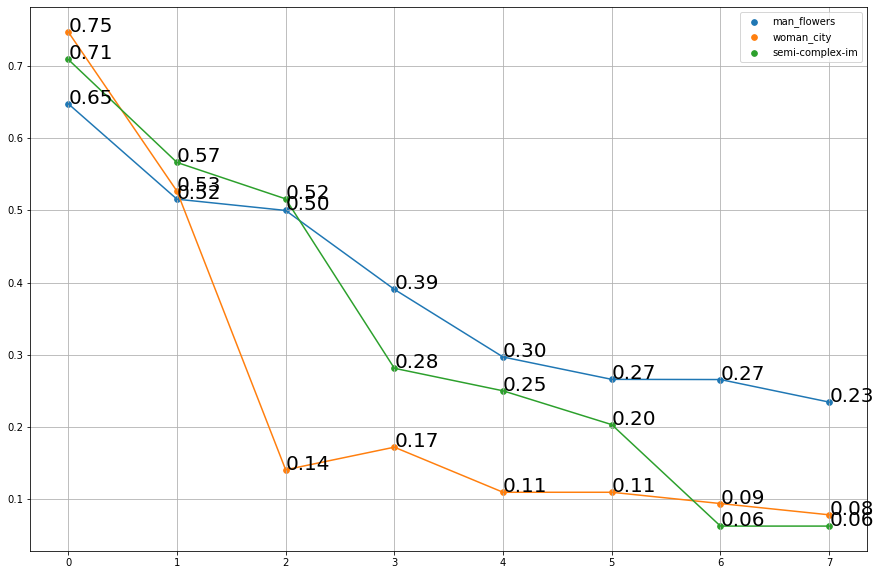

In [50]:
path_top = "/home/vinker/dev/background_project/experiements/simplify_08_21/"
weights = [0.1, 1, 2, 5, 10, 15, 20, 25]

names = ["man_flowers", "woman_city", "semi-complex-im"]
seeds_ = [[0, 1000, 1000, 1000, 0, 1000, 1000, 1000],
        [0, 0, 0, 1000, 1000, 1000, 0, 0],
        [1000, 0, 1000, 0, 0, 0, 0, 0]]

layer = 11

plt.figure(figsize=(15,10))
plt.grid()
for im_name, seeds in zip(names, seeds_):
    ratios = []
    for w, seed in zip(weights, seeds):
        res_filename = f"width{w}_b_prev-w_gradnorm_clip_l{layer}L2__64s_{im_name}_mask"
        if im_name == "semi-complex-im":
            res_filename = f"width{w}_a_prev-w_gradnorm_clip_l{layer}L2__64s_{im_name}"
        path_conf = f"{path_top}/{res_filename}/{res_filename}_seed{seed}/config.npy"
        config = np.load(path_conf, allow_pickle=True)[()]
        loss_clip = np.array(config[f"clip_vit_l{layer}_original_eval"])
        loss_width = np.array(config["width_loss_original_eval"])

        norm_clip = normalise_arr(loss_clip)
        norm_width = normalise_arr(loss_width)
        loss_sum_norm = norm_clip + norm_width
        best_iter = np.argsort(loss_sum_norm)[0]
        ratio = loss_width[best_iter] / loss_clip[best_iter]
        ratio = loss_width[best_iter]
        ratios.append(ratio)
    
    print(im_name)
    print(ratios)
    plt.plot(range(len(weights)), ratios)
    plt.scatter(range(len(weights)), ratios, label=im_name, s=32)
    # plt.xticks(weights, [str(i) for i in weights])
    for i in range(len(ratios)):
        plt.annotate("{:.2f}".format(ratios[i]), (i, ratios[i]), fontsize=20)
    plt.legend()
plt.show()

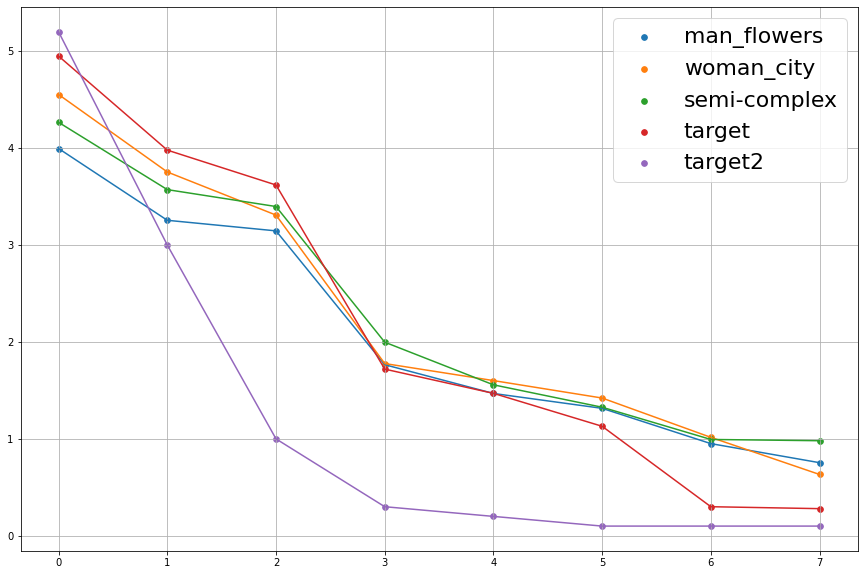

In [66]:
path_top = "/home/vinker/dev/background_project/experiements/ratio_loss_30_08/"
ratios_target = [4.95,3.98,3.62,1.72,1.47,1.13,0.3,0.28]
ratios_target2 = [5.2,3.0,1.0,0.3,0.2,0.1,0.1,0.1]
# ratios_target2 = [5.2,3.98,3.0,1.72,1.47,1.1,0.2,0.1]

names = ["man_flowers", "woman_city", "semi-complex"]
seeds_ = [[1000, 1000, 1000, 1000, 0, 0, 0, 0],
        [1000, 0, 1000, 1000, 1000, 1000, 0, 1000],
        [1000, 1000, 0, 1000, 0, 1000, 1000, 1000]]

layer = 11


# ratio0.2_width1_lr5e-05_gradnorm_clip_l11L2__64s_woman_city_mask

plt.figure(figsize=(15,10))
plt.grid()
for im_name, seeds in zip(names, seeds_):
    ratios = []
    widths = []
    for ratio, seed in zip(ratios_target, seeds):
        res_filename = f"ratio{ratio}_width1_lr5e-05_gradnorm_clip_l{layer}L2__64s_{im_name}_mask"
        path_conf = f"{path_top}/{res_filename}/{res_filename}_seed{seed}/config.npy"
        config = np.load(path_conf, allow_pickle=True)[()]
        loss_clip = np.array(config[f"clip_vit_l{layer}_original_eval"])
        loss_width = np.array(config["width_loss_original_eval"])

        norm_clip = normalise_arr(loss_clip)
        norm_width = normalise_arr(loss_width)
        loss_sum_norm = norm_clip + norm_width
        best_iter = np.argsort(loss_sum_norm)[0]
        ratio = loss_width[best_iter] / loss_clip[best_iter]
        
        width_loss_ = loss_width[best_iter]
        clip_loss_ = loss_clip[best_iter]
        num_s = np.array(config["num_strokes"])[best_iter].cpu()
        # ratios.append(width_loss_)
        ratios.append(ratio)
        
        
        # widths.append(width_loss_)

    plt.plot(range(len(ratios_target[::-1])), ratios)
    plt.scatter(range(len(ratios_target[::-1])), ratios, label=im_name, s=32)
    # plt.xticks(ratios_target[::-1], [str(i) for i in ratios_target])
    # for i in range(len(ratios)):
    #     plt.annotate("{:.2f}".format(ratios[i]), (range(len(ratios_target[::-1]))[i], ratios[i]), fontsize=20)
    
plt.plot(range(len(ratios_target[::-1])), ratios_target)
plt.scatter(range(len(ratios_target[::-1])), ratios_target, label="target", s=32)
plt.plot(range(len(ratios_target[::-1])), ratios_target2)
plt.scatter(range(len(ratios_target[::-1])), ratios_target2, label="target2", s=32)
plt.legend(fontsize=22)
plt.show()

#4.95,3.98,3.62,1.72,1.47,1.13,0.3,0.28
#5.2,3.98,3.0,1.72,1.47,1.1,0.2,0.1

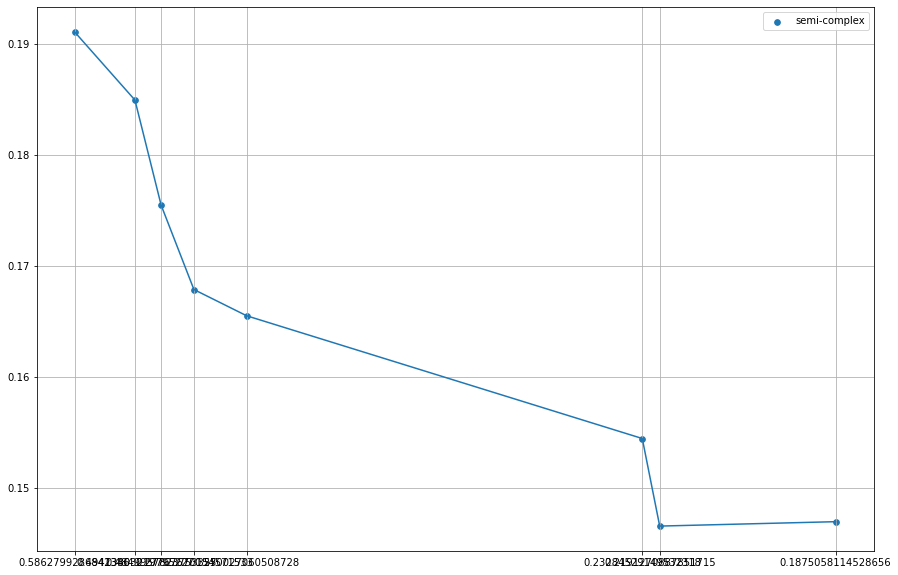

In [25]:
path_top = "/home/vinker/dev/background_project/experiements/ratio_loss_30_08/"
ratios_target = [4.95,3.98,3.62,1.72,1.47,1.13,0.3,0.28]

names = ["semi-complex"]
seeds_ = [[0, 1000, 1000, 1000, 0, 1000, 1000, 1000],
        [0, 0, 0, 1000, 1000, 1000, 0, 0],
        [1000, 0, 1000, 0, 0, 0, 0, 0]]

layer = 11

# ratio0.2_width1_lr5e-05_gradnorm_clip_l11L2__64s_woman_city_mask

plt.figure(figsize=(15,10))
plt.grid()
for im_name, seeds in zip(names, seeds_):
    ratios = []
    widths = []
    clips = []
    for ratio, seed in zip(ratios_target, seeds):
        res_filename = f"ratio{ratio}_width1_lr5e-05_gradnorm_clip_l{layer}L2__64s_{im_name}_mask"
        path_conf = f"{path_top}/{res_filename}/{res_filename}_seed{seed}/config.npy"
        config = np.load(path_conf, allow_pickle=True)[()]
        loss_clip = np.array(config[f"clip_vit_l{layer}_original_eval"])
        loss_width = np.array(config["width_loss_original_eval"])

        norm_clip = normalise_arr(loss_clip)
        norm_width = normalise_arr(loss_width)
        loss_sum_norm = norm_clip + norm_width
        best_iter = np.argsort(loss_sum_norm)[0]
        
        clip_loss = loss_clip[best_iter]
        width_loss = loss_width[best_iter]
        widths.append(width_loss)
        clips.append(clip_loss)
        # ratio = loss_width[best_iter] / loss_clip[best_iter]
        # ratios.append(ratio)

    plt.plot(widths[::-1], clips[::-1])
    plt.scatter(widths[::-1], clips[::-1], label=im_name, s=32)
    plt.xticks(widths[::-1], [str(i) for i in widths])
    # for i in range(len(ratios)):
    #     plt.annotate("{:.2f}".format(ratios[i]), (ratios_target[::-1][i], ratios[i]), fontsize=20)
    plt.legend()
    
    # plt.plot(ratios_target[::-1], ratios)
    # plt.scatter(ratios_target[::-1], ratios, label=im_name, s=32)
    # plt.xticks(ratios_target[::-1], [str(i) for i in weights])
    # for i in range(len(ratios)):
    #     plt.annotate("{:.2f}".format(ratios[i]), (ratios_target[::-1][i], ratios[i]), fontsize=20)
    # plt.legend()
plt.show()

[37.48041855258238, 31.48305983478767, 20.20385418667053, 11.193072962859576, 7.907613663428245, 5.419444535198825]


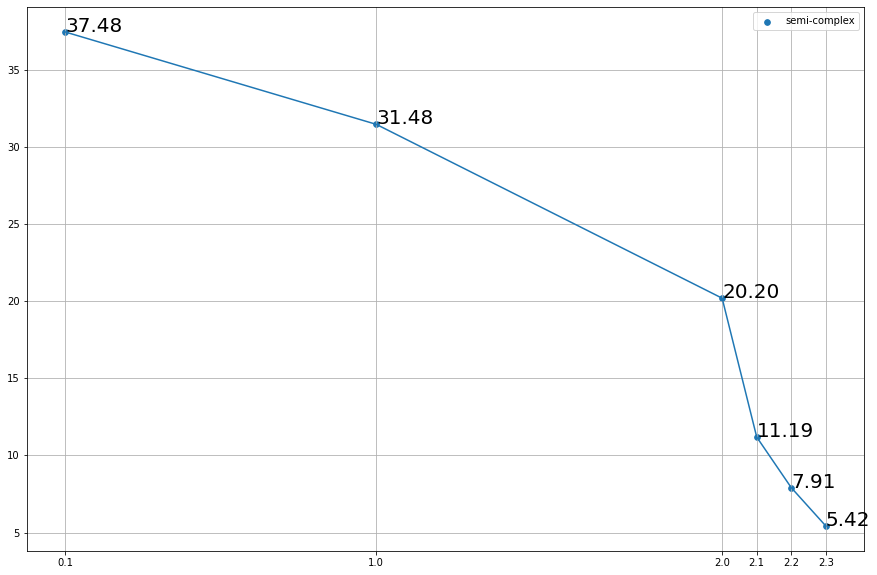

In [20]:
path_top = "/home/vinker/dev/background_project/experiements/simplify_08_21/"
weights = [0.1, 1.0, 2.0, 2.1, 2.2, 2.3]

names = ["semi-complex"]
seeds_ = [[1000, 0, 0, 0, 0, 1000, 1000, 1000],
        [0, 0, 0, 1000, 1000, 1000, 0, 0],
        [1000, 0, 1000, 0, 0, 0, 0, 0]]

layer = 4

plt.figure(figsize=(15,10))
plt.grid()
for im_name, seeds in zip(names, seeds_):
    ratios = []
    for w, seed in zip(weights, seeds):
        res_filename = f"width{w}_lr5e-05_gradnorm_clip_l{layer}L2__64s_{im_name}_mask"
        path_conf = f"{path_top}/{res_filename}/{res_filename}_seed{seed}/config.npy"
        config = np.load(path_conf, allow_pickle=True)[()]
        loss_clip = np.array(config[f"clip_vit_l{layer}_original_eval"])
        loss_width = np.array(config["width_loss_original_eval"])

        norm_clip = normalise_arr(loss_clip)
        norm_width = normalise_arr(loss_width)
        loss_sum_norm = norm_clip + norm_width
        best_iter = np.argsort(loss_sum_norm)[0]
        ratio = loss_width[best_iter] / loss_clip[best_iter]
        ratios.append(ratio)
    print(ratios)
    plt.plot(weights, ratios)
    plt.scatter(weights, ratios, label=im_name, s=32)
    plt.xticks(weights, [str(i) for i in weights])
    for i in range(len(ratios)):
        plt.annotate("{:.2f}".format(ratios[i]), (weights[i], ratios[i]), fontsize=20)
    plt.legend()
plt.show()

In [45]:
a = {"a":5, "b":7, "c":1}
b = sum(a[["a"]])
print(b)

TypeError: unhashable type: 'list'

In [ ]:
import shutil

path = "/home/vinker/dev/background_project/experiements/ratio_loss_30_08"
dirs = os.listdir(path)
seeds = [0, 1000]
for dir_ in dirs:
    print(dir_)
    for s in seeds:
        cur_path = f"{path}/{dir_}/{dir_}_seed{s}/mlps"
        if os.path.isdir(cur_path):
            print("ok")
            shutil.rmtree(cur_path)
        

======= layer 4 =======
[woman_city] [4] [0.30] [0.31]
[semi-complex] [4] [0.31] [0.33]
[man_flowers] [4] [0.32] [0.33]
[van] [4] [0.33] [0.36]
[van2] [4] [0.31] [0.31]
[panda] [4] [0.35] [0.36]


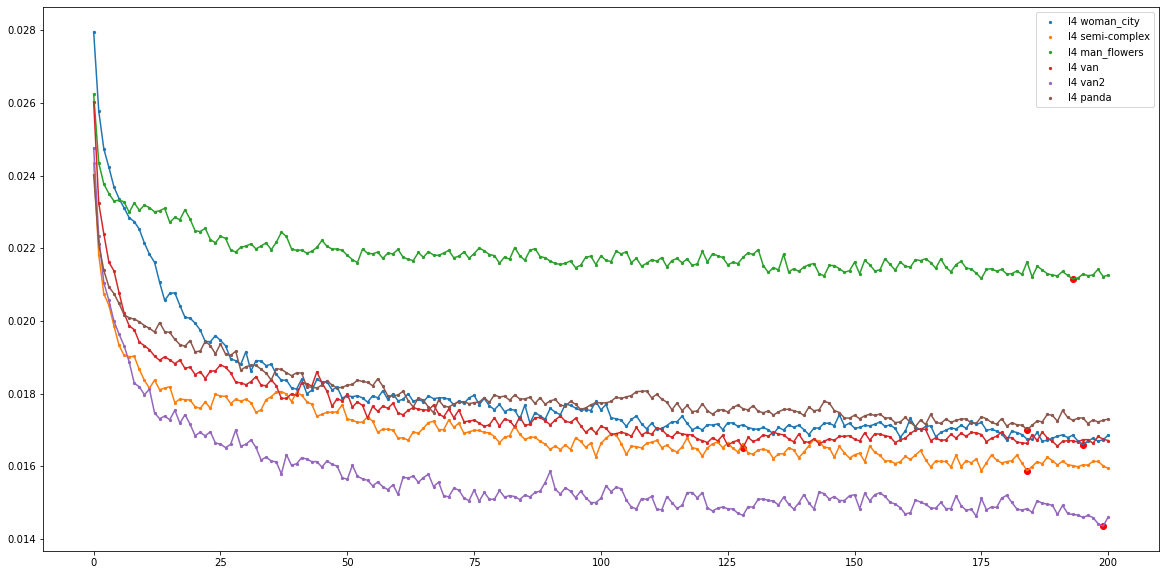

======= layer 6 =======
[woman_city] [6] [0.39] [0.38]
[semi-complex] [6] [0.42] [0.44]
[man_flowers] [6] [0.39] [0.40]
[van] [6] [0.42] [0.44]
[van2] [6] [0.42] [0.41]
[panda] [6] [0.45] [0.46]


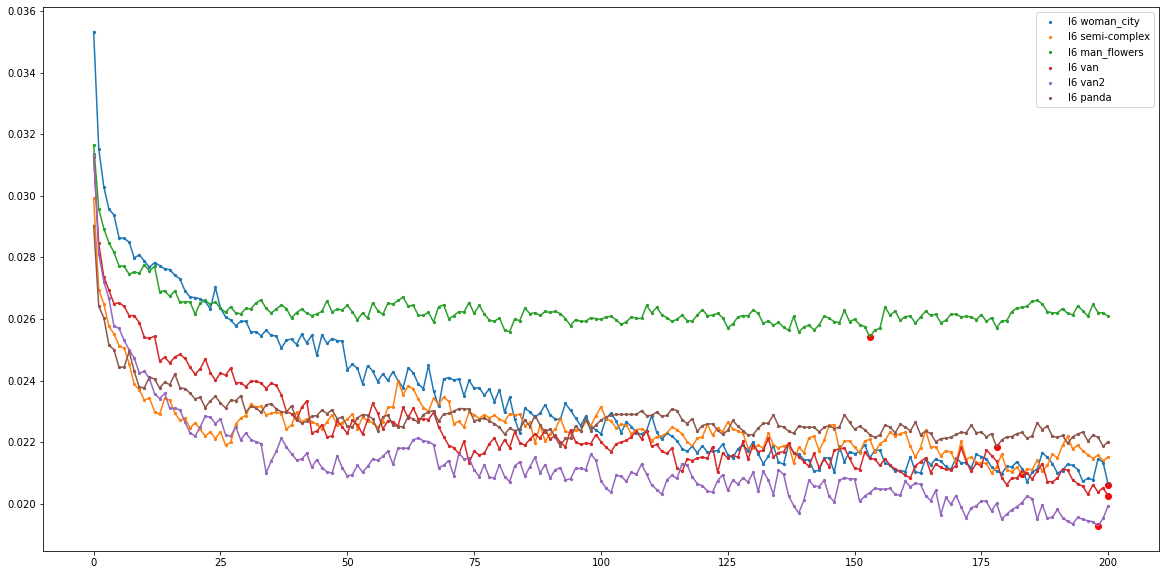

======= layer 7 =======
[woman_city] [7] [0.54] [0.55]
[semi-complex] [7] [0.51] [0.53]
[man_flowers] [7] [0.53] [0.55]
[van] [7] [0.58] [0.61]
[van2] [7] [0.51] [0.50]
[panda] [7] [0.57] [0.58]


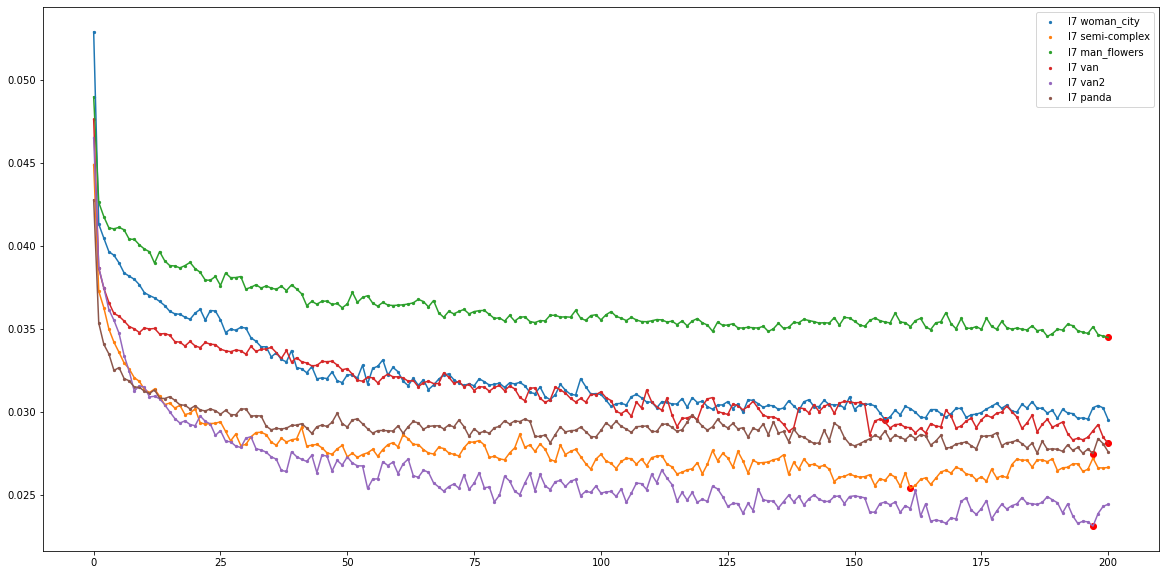

======= layer 8 =======
[woman_city] [8] [1.00] [1.00]
[semi-complex] [8] [1.00] [1.00]
[man_flowers] [8] [1.00] [1.00]
[van] [8] [1.00] [1.00]
[van2] [8] [1.00] [1.00]
[panda] [8] [1.00] [1.00]


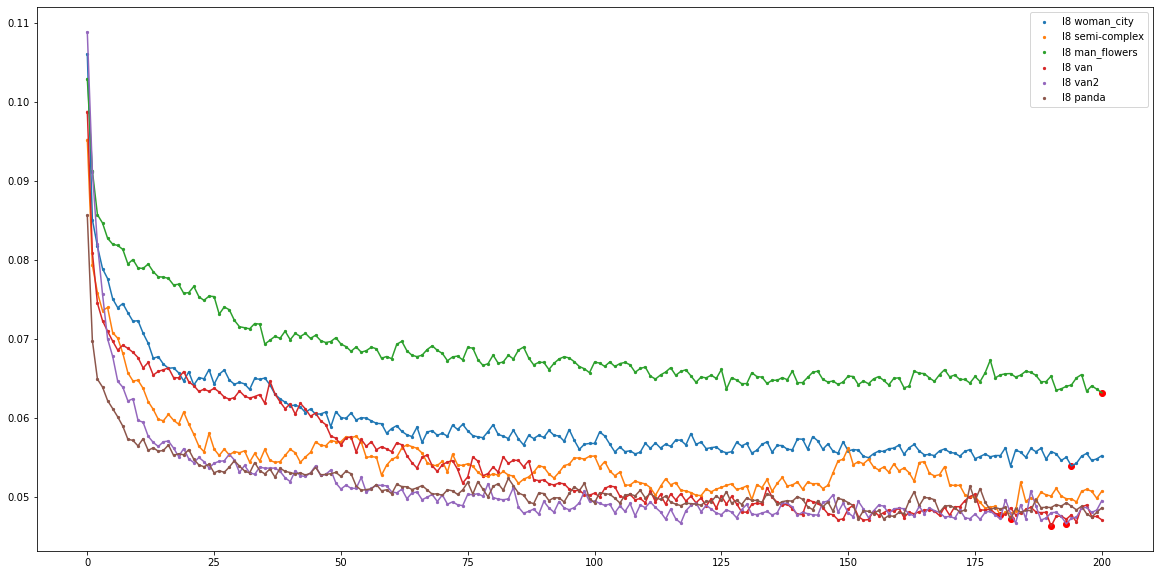

======= layer 11 =======
[woman_city] [11] [3.67] [3.32]
[semi-complex] [11] [2.69] [2.75]
[man_flowers] [11] [3.12] [3.13]
[van] [11] [3.67] [3.82]
[van2] [11] [3.33] [3.28]
[panda] [11] [3.23] [3.22]


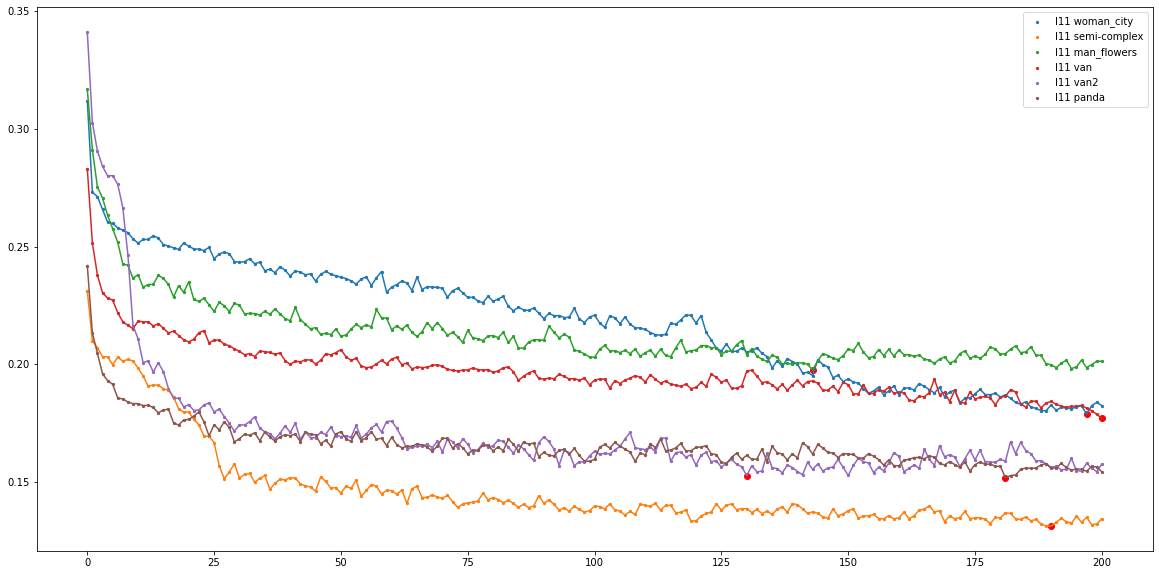


{4: 0.32025482778810155, 6: 0.41236305117483196, 7: 0.5418889489336908, 8: 1.0, 11: 3.2859784821424127}
{4: {'woman_city': 0.3078908646842475, 'semi-complex': 0.33307119593816775, 'man_flowers': 0.33491199745814465, 'van': 0.35664127354418196, 'van2': 0.30829662019897397, 'panda': 0.360864892883409}, 6: {'woman_city': 0.38254147674823236, 'semi-complex': 0.439681864930151, 'man_flowers': 0.4024057637088821, 'van': 0.43730398211976423, 'van2': 0.4139957966452066, 'panda': 0.4635915782376241}, 7: {'woman_city': 0.5483219687580057, 'semi-complex': 0.5335050903815193, 'man_flowers': 0.5461752106359757, 'van': 0.6077038282074162, 'van2': 0.4973508365617124, 'panda': 0.5839416511424658}, 8: {'woman_city': 1.0, 'semi-complex': 1.0, 'man_flowers': 1.0, 'van': 1.0, 'van2': 1.0, 'panda': 1.0}, 11: {'woman_city': 3.315232687727019, 'semi-complex': 2.7499560173467117, 'man_flowers': 3.1255491608174037, 'van': 3.821799446253639, 'van2': 3.2771231659137583, 'panda': 3.2189417547162025}}


In [215]:
# calc realations between layers
# im_name = "semi-complex" #8.63
# im_name = "man_flowers" #9.74 
# im_name = "woman_city" #12.1
# im_name = "van" #11.26
# im_name = "van2" #10.86
# im_name = "panda" #9.19
from PIL import Image

def get_clip_loss(path, layer):
    path_config = f"{path}/config.npy"
    config = np.load(path_config, allow_pickle=True)[()]
    loss_clip = np.array(config[f"loss_eval"])
    best_iter = np.argsort(loss_clip)[0]
    return loss_clip, best_iter

images = ["woman_city", "semi-complex", "man_flowers", "van", "van2", "panda"]

rel_layer = 8
layers = [4, 6, 7, 8, 11]
final_w = {}
final_w_iter = {}
for l in layers:
    final_w_iter[l] = {}
for layer in layers:
    divs = []
    divs2 = []
    print(f"======= layer {layer} =======")
    plt.figure(figsize=(20,10))
    for im_name in images:
        path_l_rel = f"/home/vinker/dev/background_project/experiements/big_test_07_27/ViT_l{rel_layer}_64s_{im_name}_mask/ViT_l{rel_layer}_64s_{im_name}_mask_seed0"
        loss_clip_l_rel, best_iter_rel = get_clip_loss(path_l_rel, rel_layer)
        best_lclip_rel = loss_clip_l_rel[best_iter_rel]
        mean_l_rel = loss_clip_l_rel.mean()

        path_li = f"/home/vinker/dev/background_project/experiements/big_test_07_27/ViT_l{layer}_64s_{im_name}_mask/ViT_l{layer}_64s_{im_name}_mask_seed0"
        loss_clip_li, best_iter = get_clip_loss(path_li, layer)
        best_lclip_i = loss_clip_li[best_iter]
        mean_li = loss_clip_li.mean()

        div = (loss_clip_li / loss_clip_l_rel).mean()
        divs.append(div)
        
        div2 = best_lclip_i / best_lclip_rel
        divs2.append(div2)
        print(f"[{im_name}] [{layer}] [{div:.2f}] [{div2:.2f}]")
        final_w_iter[layer][im_name] = div2
        
        
        plt.plot(range(loss_clip_li.shape[0]), loss_clip_li)
        plt.scatter(range(loss_clip_li.shape[0]), loss_clip_li, label=f"l{layer} {im_name}", s=5)
        plt.scatter(best_iter, best_lclip_i, c="r")
        plt.legend()
    plt.show()
    plt.close()
    
    final_w[layer] = np.array(divs).mean()
print()
print(final_w)
print(final_w_iter)
    # print(layer, np.array(divs).mean())
#     plt.figure(figsize=(20,10))
#     plt.plot(range(loss_clip_l4.shape[0]), loss_clip_l4)
#     plt.scatter(range(loss_clip_l4.shape[0]), loss_clip_l4, label="l4")
#     plt.legend()
#     plt.show()

#     plt.figure(figsize=(20,10))
#     plt.plot(range(loss_clip_l11.shape[0]), loss_clip_l11)
#     plt.scatter(range(loss_clip_l11.shape[0]), loss_clip_l11, label="l11")

#     # plt.plot(range(sub.shape[0]), sub)
#     # plt.scatter(range(sub.shape[0]), sub, label="sub")

#     plt.legend()
#     plt.show()


[16.    11.95  10.03   6.44   3.567  2.518  1.721  1.02 ]


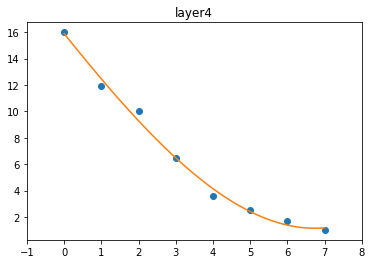

[12.41531291  9.27268683  7.78284928  4.99716345  2.76783882  1.95385987
  1.33542209  0.7914762 ]


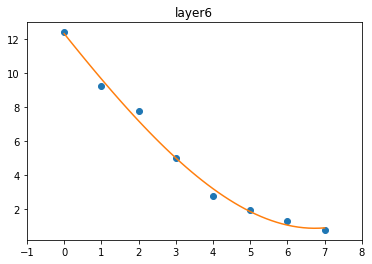

[9.44392386 7.05343063 5.92015977 3.80117935 2.10540478 1.48623752
 1.01581206 0.60205015]


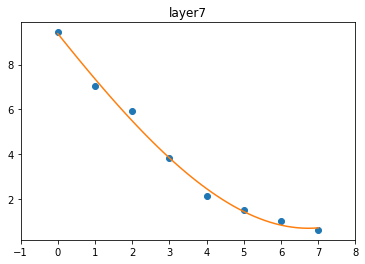

[5.10138237 3.81009496 3.19792908 2.05330641 1.13728943 0.80283005
 0.54871744 0.32521313]


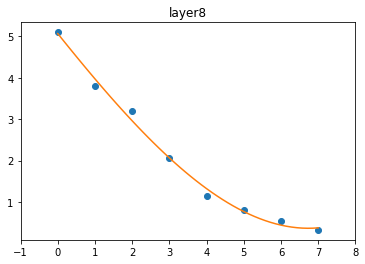

[1.55357585 1.16032697 0.97389786 0.62531428 0.34635032 0.244494
 0.1671065  0.09904046]


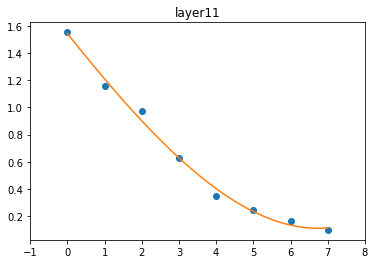

In [212]:
import numpy as np
import matplotlib.pyplot as plt

# ratios_layer4 = [50.2,37.48,31.48,20.2,11.19,7.9,5.4, 3.2]
ratios_layer4 = [16,11.95,10.03,6.44,3.567,2.518,1.721,1.02]

for k in final_w.keys():
    a = ratios_layer4
    b = range(len(a))

    points = np.array([(b_, a_) for (b_, a_) in zip(b, a)])
    # get x and y vectors
    x = points[:,0]
    y = points[:,1] / final_w[k]
    print(y)

    # calculate polynomial
    z = np.polyfit(x, y, 3)
    f = np.poly1d(z)

    # calculate new x's and y's
    x_new = np.linspace(x[0], x[-1], 50)
    y_new = f(x_new)

    plt.plot(x,y,'o', x_new, y_new)
    plt.xlim([x[0]-1, x[-1] + 1 ])
    plt.title(f"layer{k}")
    plt.show()


=================== 4 ===================
woman_city 0.3078908646842475 [51.966, 38.812, 32.576, 20.917, 11.585, 8.178, 5.59, 3.313]
semi-complex 0.33307119593816775 [48.038, 35.878, 30.114, 19.335, 10.709, 7.56, 5.167, 3.062]
man_flowers 0.33491199745814465 [47.774, 35.681, 29.948, 19.229, 10.651, 7.518, 5.139, 3.046]
van 0.35664127354418196 [44.863, 33.507, 28.123, 18.057, 10.002, 7.06, 4.826, 2.86]
van2 0.30829662019897397 [51.898, 38.761, 32.534, 20.889, 11.57, 8.167, 5.582, 3.309]
panda 0.360864892883409 [44.338, 33.115, 27.794, 17.846, 9.885, 6.978, 4.769, 2.827]


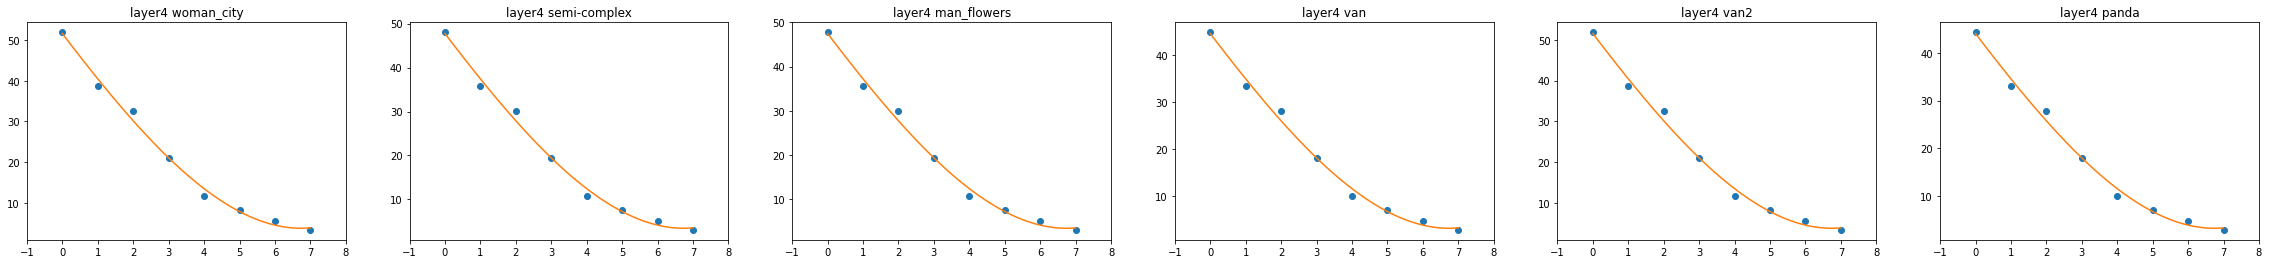

=================== 6 ===================
woman_city 0.38254147674823236 [41.826, 31.238, 26.219, 16.835, 9.324, 6.582, 4.499, 2.666]
semi-complex 0.439681864930151 [36.39, 27.179, 22.812, 14.647, 8.113, 5.727, 3.914, 2.32]
man_flowers 0.4024057637088821 [39.761, 29.696, 24.925, 16.004, 8.864, 6.257, 4.277, 2.535]
van 0.43730398211976423 [36.588, 27.327, 22.936, 14.727, 8.157, 5.758, 3.935, 2.332]
van2 0.4139957966452066 [38.648, 28.865, 24.227, 15.556, 8.616, 6.082, 4.157, 2.464]
panda 0.4635915782376241 [34.513, 25.777, 21.635, 13.892, 7.694, 5.432, 3.712, 2.2]


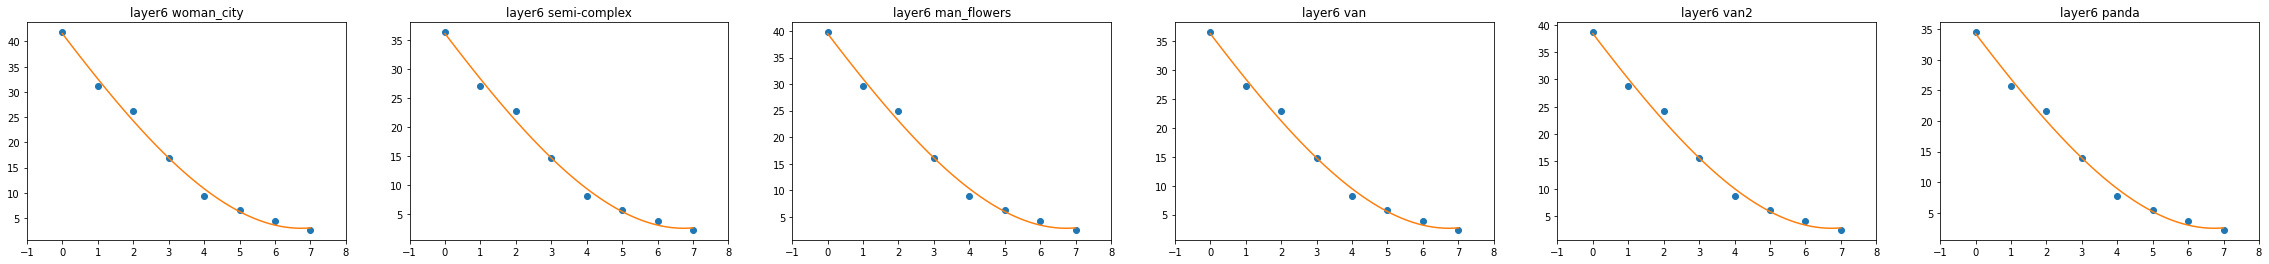

=================== 7 ===================
woman_city 0.5483219687580057 [29.18, 21.794, 18.292, 11.745, 6.505, 4.592, 3.139, 1.86]
semi-complex 0.5335050903815193 [29.99, 22.399, 18.8, 12.071, 6.686, 4.72, 3.226, 1.912]
man_flowers 0.5461752106359757 [29.295, 21.879, 18.364, 11.791, 6.531, 4.61, 3.151, 1.868]
van 0.6077038282074162 [26.329, 19.664, 16.505, 10.597, 5.87, 4.143, 2.832, 1.678]
van2 0.4973508365617124 [32.17, 24.027, 20.167, 12.949, 7.172, 5.063, 3.46, 2.051]
panda 0.5839416511424658 [27.4, 20.464, 17.176, 11.028, 6.108, 4.312, 2.947, 1.747]


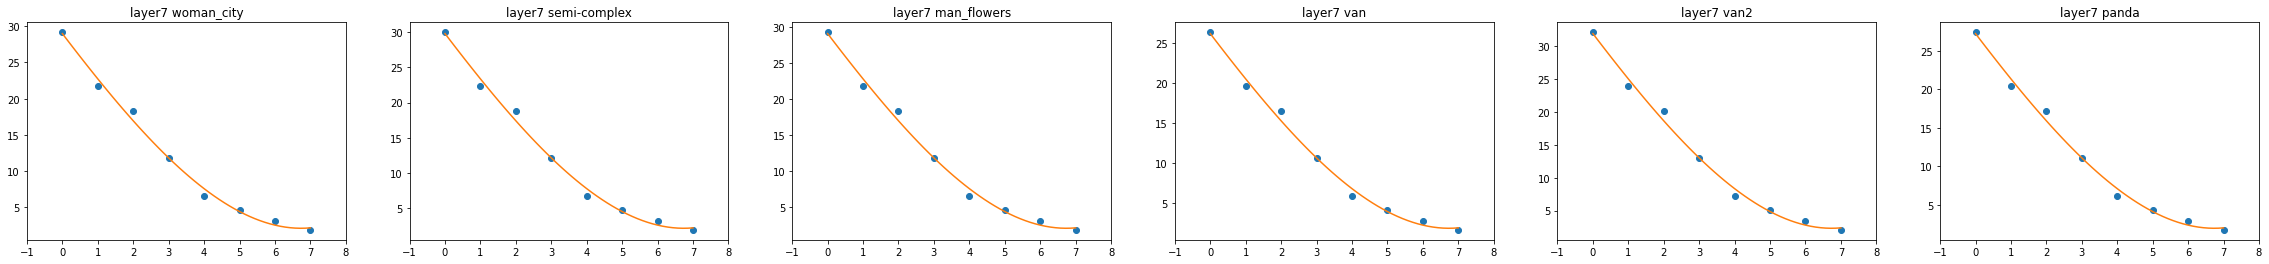

=================== 8 ===================
woman_city 1.0 [16.0, 11.95, 10.03, 6.44, 3.567, 2.518, 1.721, 1.02]
semi-complex 1.0 [16.0, 11.95, 10.03, 6.44, 3.567, 2.518, 1.721, 1.02]
man_flowers 1.0 [16.0, 11.95, 10.03, 6.44, 3.567, 2.518, 1.721, 1.02]
van 1.0 [16.0, 11.95, 10.03, 6.44, 3.567, 2.518, 1.721, 1.02]
van2 1.0 [16.0, 11.95, 10.03, 6.44, 3.567, 2.518, 1.721, 1.02]
panda 1.0 [16.0, 11.95, 10.03, 6.44, 3.567, 2.518, 1.721, 1.02]


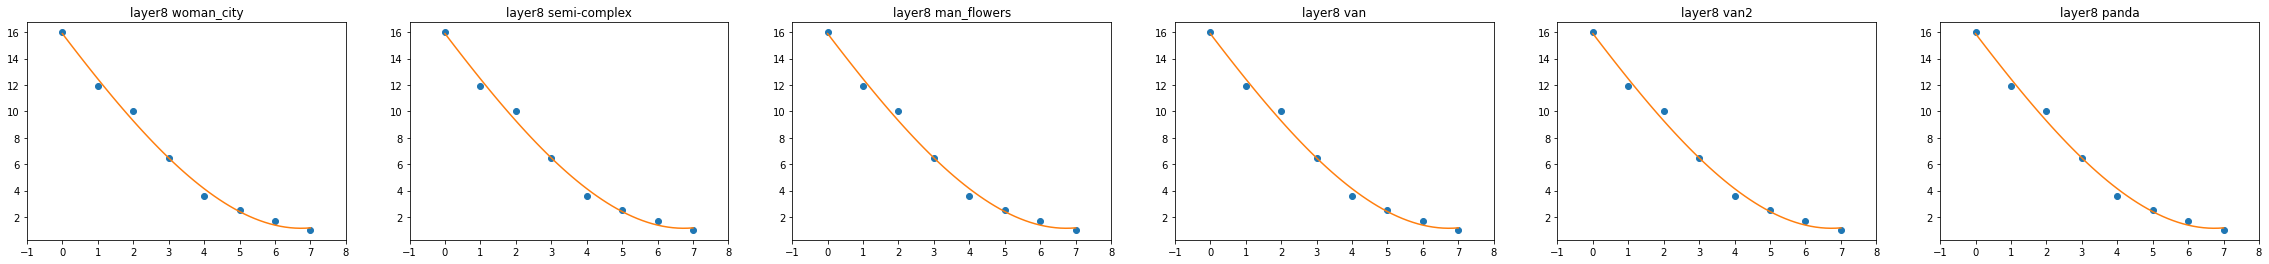

=================== 11 ===================
woman_city 3.315232687727019 [4.826, 3.605, 3.025, 1.943, 1.076, 0.76, 0.519, 0.308]
semi-complex 2.7499560173467117 [5.818, 4.346, 3.647, 2.342, 1.297, 0.916, 0.626, 0.371]
man_flowers 3.1255491608174037 [5.119, 3.823, 3.209, 2.06, 1.141, 0.806, 0.551, 0.326]
van 3.821799446253639 [4.187, 3.127, 2.624, 1.685, 0.933, 0.659, 0.45, 0.267]
van2 3.2771231659137583 [4.882, 3.646, 3.061, 1.965, 1.088, 0.768, 0.525, 0.311]
panda 3.2189417547162025 [4.971, 3.712, 3.116, 2.001, 1.108, 0.782, 0.535, 0.317]


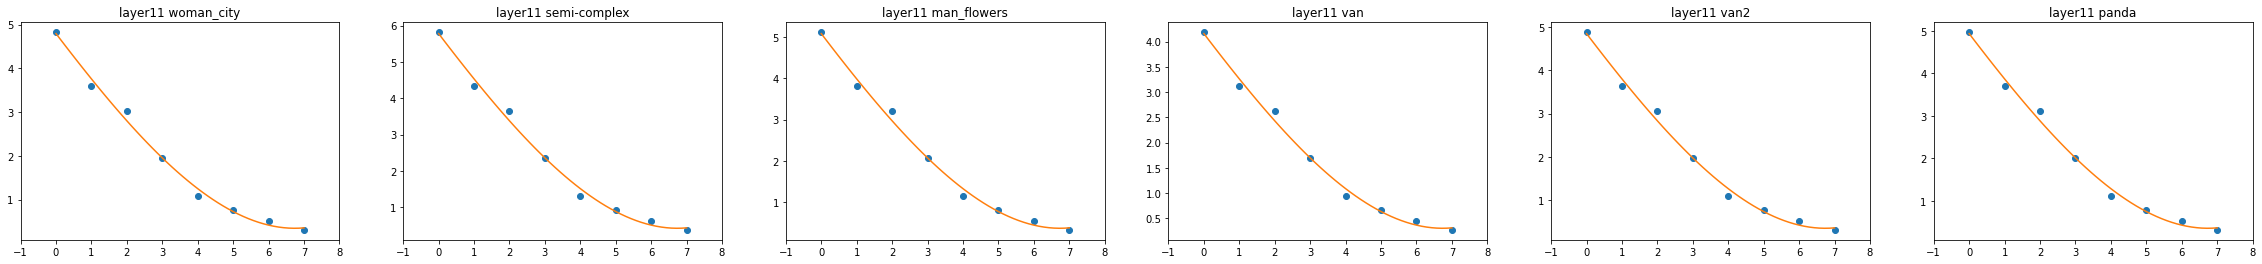

In [239]:
import numpy as np
import matplotlib.pyplot as plt

# ratios_layer4 = [50.2,37.48,31.48,20.2,11.19,7.9,5.4, 3.2]
ratios_layer4 = [16,11.95,10.03,6.44,3.567,2.518,1.721,1.02]
# ratios_layer4 = [60,50,37.5,31.5,20,13,8,5.5,3.5]


a = ratios_layer4
b = range(len(a))
points = np.array([(b_, a_) for (b_, a_) in zip(b, a)])

for layer in final_w_iter.keys():
    plt.figure(figsize=(40,4))
    print(f"=================== {layer} ===================")
    for i, im_name in enumerate(final_w_iter[layer].keys()):
        # get x and y vectors
        x = points[:,0]
        y = points[:,1] / final_w_iter[layer][im_name]
        print(im_name, final_w_iter[layer][im_name], [float(f"{y_:.3f}") for y_ in y])

        # calculate polynomial
        z = np.polyfit(x, y, 3)
        f = np.poly1d(z)

        # calculate new x's and y's
        x_new = np.linspace(x[0], x[-1], 50)
        y_new = f(x_new)
        
        plt.subplot(1, len(final_w_iter[layer].keys()), i + 1)
        plt.plot(x,y,'o', x_new, y_new)
        plt.xlim([x[0]-1, x[-1] + 1 ])
        plt.title(f"layer{layer} {im_name}")
    plt.show()
    plt.close()

In [138]:
seed = 1000
path = f"/home/vinker/dev/background_project/experiements/ratio_loss_objects_09_04/ratio50.2_c_width1_lr5e-05_gradnorm_clip_l4L2__64s_man_flowers_mask/ratio50.2_c_width1_lr5e-05_gradnorm_clip_l4L2__64s_man_flowers_mask_seed0"

# os.listdir(path)
path_config = f"{path}/config.npy"
config = np.load(path_config, allow_pickle=True)[()]


losses_eval = {}
for k in config.keys():
    if "_original_eval" in k and "normalization" not in k:
        # print(k)
        cur_arr = np.array(config[k])
        mu = cur_arr.mean()
        std = cur_arr.std()
        losses_eval[k] = (cur_arr - mu) / std
# print(losses_eval)
for k_ in losses_eval.keys():
    print(k_, losses_eval[k_])
final_normalise_losses = sum(list(losses_eval.values()))
print(final_normalise_losses)
sorted_iters = np.argsort(final_normalise_losses)
index = 0
best_iter = sorted_iters[index]
while best_iter < 5:
    print(best_iter)
    index += 1
    best_iter = sorted_iters[index]
# best_iter = np.argsort(final_normalise_losses)[0]
print(best_iter)
# best_normalised_loss = final_normalise_losses[best_iter]
# best_num_strokes = configs_to_save["num_strokes"][best_iter]

# iter_ = best_iter * eval_interval
# configs_to_save["best_normalised_iter"] = iter_
# configs_to_save["best_normalised_loss"] = best_normalised_loss
# configs_to_save["best_normalised_num_strokes"] = best_num_strokes


clip_vit_l4_original_eval [-0.38163255 -0.35350539 -1.14581101 -1.82112895 -1.86934694 -1.15498334
  0.15510737 -0.30277524 -1.17004983 -0.4026841  -0.33444669 -0.69287484
  0.7469007  -0.71844439  0.32292258  0.73625483 -1.48479747 -0.22482672
  0.57352238  0.01610741  0.78257084  0.38696006  0.1855195   1.0806551
 -0.2435998   0.71364535  1.0337289   1.32273821 -0.56232665 -0.85381567
 -1.52544651  0.93804593  0.24184522 -0.59219999 -0.05583009 -0.29246043
 -1.20038406 -0.59773065 -0.90054064  1.66966363  1.09510492 -0.81286803
  0.51918302  0.27202365 -1.16980965 -0.3647939   1.32832729  2.05046108
  1.00765302  2.43652953  1.613643  ]
width_loss_original_eval [-4.76748845 -3.5668572  -1.26769883 -0.09560158  0.44794765  0.64107258
 -0.67726017  1.03730886  0.66449176  0.02490542  0.47729519  0.52361186
 -0.35685592  1.60915859 -0.534499    0.46083075 -0.24738481  0.07962881
  0.28845693  0.51633973  0.22052209  0.9324102  -0.06263621 -0.47715375
  0.69541534  0.62156187 -0.06602054

loss_width 0.6496528387069702 loss_clip 0.01766839064657688
loss_width 0.4559648036956787 loss_clip 0.017417825758457184
loss_width 0.39753156900405884 loss_clip 0.017737245187163353
loss_width 0.3050198554992676 loss_clip 0.019697614014148712
loss_width 0.17187386751174927 loss_clip 0.02024725265800953
loss_width 0.14062508940696716 loss_clip 0.02021571435034275
loss_width 0.10937522351741791 loss_clip 0.020474031567573547
loss_width 0.06486265361309052 loss_clip 0.02157718501985073


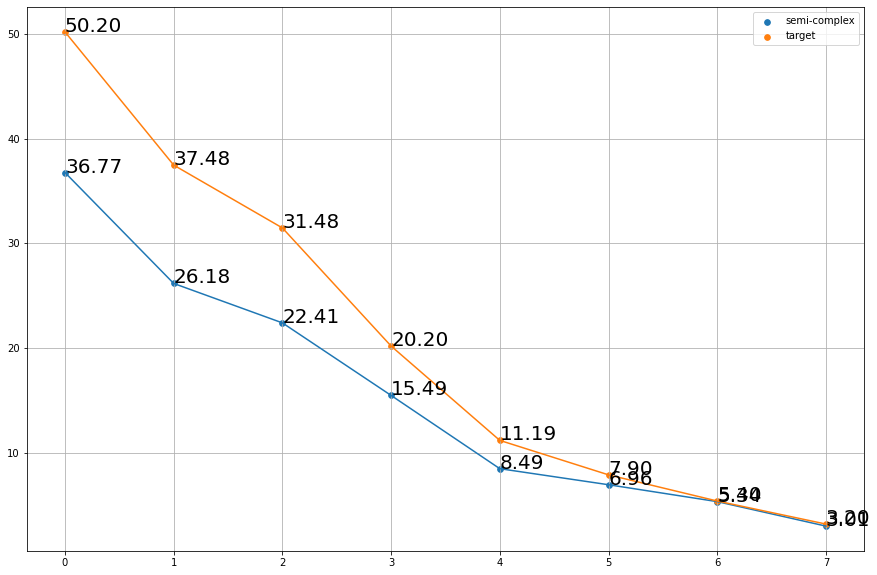

In [165]:
path_top = "/home/vinker/dev/background_project/experiements/ratio_loss_objects_09_04/"
# /home/vinker/dev/background_project/experiements/ratio_loss_objects_09_04//ratio50.2_points-mlp1_opt1_gradnorm_clip_l4L2__64s_semi-complex_mask/ratio50.2_points-mlp1_opt1_gradnorm_clip_l4L2__64s_semi-complex_mask_seed0
ratios_target = [50.2,37.48,31.48,20.2,11.19,7.9,5.4,3.2]
names = ["semi-complex"]
seeds_ = [[0, 0, 0, 0, 1000, 1000, 1000, 0]]

layer = 4


# ratio0.2_width1_lr5e-05_gradnorm_clip_l11L2__64s_woman_city_mask

plt.figure(figsize=(15,10))
plt.grid()
for im_name, seeds in zip(names, seeds_):
    ratios = []
    widths = []
    for ratio, seed in zip(ratios_target, seeds):
        res_filename = f"ratio{ratio}_points-mlp1_opt1_gradnorm_clip_l{layer}L2__64s_{im_name}_mask"
        path_conf = f"{path_top}/{res_filename}/{res_filename}_seed{seed}/config.npy"
        config = np.load(path_conf, allow_pickle=True)[()]
        loss_clip = np.array(config[f"clip_vit_l{layer}_original_eval"])
        loss_width = np.array(config["width_loss_original_eval"])

        # norm_clip = normalise_arr(loss_clip)
        # norm_width = normalise_arr(loss_width)
        # loss_sum_norm = norm_clip + norm_width
        best_iter = int(config["best_normalised_iter"] / config["eval_interval"])
        
        # ratio = loss_width[best_iter] / loss_clip[best_iter]
        
        width_loss_ = loss_width[best_iter]
        clip_loss_ = loss_clip[best_iter]
        print("loss_width", width_loss_, "loss_clip", clip_loss_)
        ratio = width_loss_ / clip_loss_
        num_s = np.array(config["num_strokes"])[best_iter].cpu()
        # ratios.append(width_loss_)
        ratios.append(ratio)
        
        
        # widths.append(width_loss_)

    plt.plot(range(len(ratios_target[::-1])), ratios)
    plt.scatter(range(len(ratios_target[::-1])), ratios, label=im_name, s=32)
    for i in range(len(ratios)):
        plt.annotate("{:.2f}".format(ratios[i]), (range(len(ratios_target[::-1]))[i], ratios[i]), fontsize=20)
    
plt.plot(range(len(ratios_target[::-1])), ratios_target)
plt.scatter(range(len(ratios_target[::-1])), ratios_target, label="target", s=32)
for i in range(len(ratios_target)):
    plt.annotate("{:.2f}".format(ratios_target[i]), (range(len(ratios_target[::-1]))[i], ratios_target[i]), fontsize=20)
plt.legend()
plt.show()

#4.95,3.98,3.62,1.72,1.47,1.13,0.3,0.28
#5.2,3.98,3.0,1.72,1.47,1.1,0.2,0.1

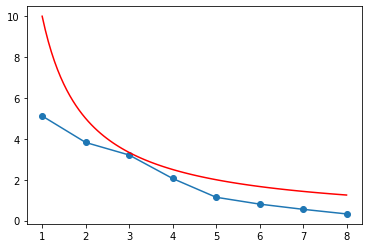

In [238]:
import numpy as np
import matplotlib.pyplot as plt

b = [5.119, 3.823, 3.209, 2.06, 1.141, 0.806, 0.551, 0.326]
a = np.array(range(1, len(b) + 1, 1))

points = np.array([(a_, b_) for (a_, b_) in zip(a, b)])
# get x and y vectors
x = points[:,0]
y = points[:,1]
plt.plot(x,y)
plt.scatter(x,y)

def f(x):
    return 10 / (x)

x = np.linspace(1, len(b), 100)
plt.plot(x, f(x), color='red')
plt.show()

# c = b / a
# plt.plot(x,c)
# plt.scatter(x,c)
# plt.show()